<a href="https://colab.research.google.com/github/alvitay/Used-Car-Prediction/blob/main/Car4U_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Price Prediction**

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Objectives

1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business.


<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;">Methodology

Perform an Exploratory Data Analysis on the data
- Univariate analysis

Data pre-processing
- Prepare the data for analysis
- Missing value Treatment, Outlier Treatment, Feature Engineering

Model building - Linear Regression
- Build the model and comment on the model statistics
- Identify the key variables that have a strong relationship with dependent variable  

Model performance evaluation
- Evaluate the model on different performance metrics - RMSE, MAE, Adjusted R-square
- Comment on the performance measures and if there is any need to improve the model or not  

Test assumptions of linear regression model
- Perform tests for the assumptions of the linear regression
- Comment on the findings from the test  



---

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy as spy
import copy
import math
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import linear_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

# Data ingestion

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Used Car Prediction/used_cars.csv")

---

## Preview the dataset

In [ ]:
# Preview the dataset
# View the first 5, last 5 and random 10 rows
print('First five rows', '--'*55)
display(data.head())

print('Last five rows', '--'*55)
display(data.tail())

print('Random ten rows', '--'*55)
np.random.seed(1)
display(data.sample(n=10))

First five rows --------------------------------------------------------------------------------------------------------------


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


Last five rows --------------------------------------------------------------------------------------------------------------


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


Random ten rows --------------------------------------------------------------------------------------------------------------


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497.0,121.36,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.50,1197.0,81.80,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.10,2499.0,141.00,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.90,1197.0,82.00,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36,2755.0,171.50,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.50,1197.0,80.00,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.50,1199.0,88.70,5.0,9.36,8.20


**Observations:**
* The **S.No.** is simply a row identifier which can be removed later.
* The **Name** is long string comprising the Brand, Model and addition specification. These can be split to further analyse by make and model.
* The **Location** is a geographical location. We can possibly create a heat map of car make by location.
* The **Fuel_Type**, **Transmission** and **Owner_Type** are categorical variable which can be possibly be onehot encoded.
* **Mileage** is a string leading with number and unit. This shall be split into the mileage number and mileage unit. Further analysis will determine if the mileage number to be converted based on the units.
* **Engine** and **Power** both are strings leading with number and unit. This shall be split and numerical portion will be used in analysis.
* **Seats** is a discrete numerical variable.
* **New_Price** has many missing values. Where it contains a value the currency term shall be removed by splitting.
* **Price** has missing values

For ease of programming analysis the dataframe column names shall be converted to lower case.

In [ ]:
data.columns = [col.lower() for col in data.columns]

Let's check the first row in the dataframe to verify the change

In [ ]:
data.head(1)

,s.no.,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75


Columns names are in lower case

---

## Variable List

In [ ]:
# Display list of variables in dataset
variable_list = data.columns.tolist()
print(variable_list)

['s.no.', 'name', 'location', 'year', 'kilometers_driven', 'fuel_type', 'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats', 'new_price', 'price']


---

## Get the shape of the dataset

In [ ]:
shape = data.shape
n_rows = shape[0]
n_cols = shape[1]
print(f"The Dataframe consists of '{n_rows}' rows and '{n_cols}' columns")

The Dataframe consists of '7253' rows and '14' columns


---

## Data info

In [ ]:
# Get info of the dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   s.no.              7253 non-null   int64  
 1   name               7253 non-null   object 
 2   location           7253 non-null   object 
 3   year               7253 non-null   int64  
 4   kilometers_driven  7253 non-null   int64  
 5   fuel_type          7253 non-null   object 
 6   transmission       7253 non-null   object 
 7   owner_type         7253 non-null   object 
 8   mileage            7251 non-null   float64
 9   engine             7207 non-null   float64
 10  power              7078 non-null   float64
 11  seats              7200 non-null   float64
 12  new_price          1006 non-null   float64
 13  price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:**
* There seems to be some missing values across 6 columns.

---

**Panda Object Variable states**

In [ ]:
# Panda Object Variable states function

def pandas_object_states(data):
    """
    This function checks if the variable type is pandas Object and
    displays the states and counts of each
    """
    # Loop through all variables
    for var in data.columns:
        # Check for pandas Object type
        if data[var].dtypes == "object":
            print('Unique values in', var, 'are :')
            print(data[var].value_counts().sort_index())
            print('--'*55)

In [ ]:
# Check the states of all pandas Object variables
pandas_object_states(data)

Unique values in name are :
name
Ambassador Classic Nova Diesel    1
Audi A3 35 TDI Attraction         2
Audi A3 35 TDI Premium            1
Audi A3 35 TDI Premium Plus       2
Audi A3 35 TDI Technology         1
                                 ..
Volvo XC60 D4 Summum              1
Volvo XC60 D5                     3
Volvo XC60 D5 Inscription         1
Volvo XC90 2007-2015 D5 AT AWD    1
Volvo XC90 2007-2015 D5 AWD       3
Name: count, Length: 2041, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in location are :
location
Ahmedabad     275
Bangalore     440
Chennai       591
Coimbatore    772
Delhi         660
Hyderabad     876
Jaipur        499
Kochi         772
Kolkata       654
Mumbai        949
Pune          765
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in fuel_type are :
fuel_type
C

---

**Missing value summary function**

In [ ]:
def missing_val_chk(data):
    """
    This function to checks for missing values
    and generates a summary.
    """
    if data.isnull().sum().any() == True:
        # Number of missing in each column
        missing_vals = pd.DataFrame(data.isnull().sum().sort_values(
            ascending=False)).rename(columns={0: '# missing'})

        # Create a percentage missing
        missing_vals['percent'] = ((missing_vals['# missing'] / len(data)) *
                                   100).round(decimals=3)

        # Remove rows with 0
        missing_vals = missing_vals[missing_vals['# missing'] != 0].dropna()

        # display missing value dataframe
        print("The missing values summary")
        display(missing_vals)
    else:
        print("There are NO missing values in the dataset")

In [ ]:
#Applying the missing value summary function
missing_val_chk(data)

The missing values summary


,# missing,percent
new_price,6247,86.130
price,1234,17.014
power,175,2.413
seats,53,0.731
engine,46,0.634
mileage,2,0.028


**There a lot of missing values that need to be dealt with.**

---

## 5 Point Summary

**Numerical type Summary**

In [ ]:
# Five point summary of all numerical type variables in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
s.no.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
kilometers_driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
new_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Categorical type Summary**

In [ ]:
data.describe(include=['object']).T

,count,unique,top,freq
name,7253,2041,Mahindra XUV500 W8 2WD,55
location,7253,11,Mumbai,949
fuel_type,7253,5,Diesel,3852
transmission,7253,2,Manual,5204
owner_type,7253,4,First,5952


**Observation:**
* The `Mileage`, `Engine`, `Power` and `New_Price` are strings with numerical values. We need to extract the numerical values for further analysis.
* **Seats** - There minimum no of seats definitely cant be 0. This may be an error would be address later on.
* **There is a significant amount of data pre-processing required before we can explore the dataset.**

---

# Feature Engineering

## `s.no.` column

**Check if column `s.no.` simliar to index**

Above we have identified that the `s.no.` is simply a row identifier.  
Let's confirm this before we drop it later.

In [ ]:
# Extract the index values and convert to Pandas Series for comparison
idx = pd.Series(data.index.values)

# Extract the first column
first_col = data['s.no.']

**Compare Series idx and first_col**

In [ ]:
first_col.equals(idx)

True

Therefore, let's drop the `s.no.` column

In [ ]:
data.drop(columns="s.no.",inplace=True)

Let's do a check to see if **s.no.** is in the dropped dataframe

In [ ]:
"s.no." in data.columns

False

Lets preview the dataframe to see if the column has been dropped

In [ ]:
data.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


**s.no.** column dropped!!

---

## `name` column

The `name` is long string comprising the car make, car model and additional specification.   
Let's split and uppercase the name column into `car_make`, `car_model` and `car_spec`.
The conversion to uppercase will clear any string case inconsistencies when the dataset was being built.
This will enable further analysis in car data.

In [ ]:
# The name will be split by the " " separator
# The first term will be assigned to the car_make
data["car_make"] = data.name.str.split(' ').str[0].str.upper()

# The second term will be assigned to the car_model
data["car_model"] = data.name.str.split(' ').str[1].str.upper()

# The third and remaining term will be joined using " " and assigned to the car_spec
data["car_spec"] = data.name.apply(lambda x: str.upper(" ".join(x.split(" ")[2:])))

Let's check the first row in the dataframe to verify the additional of the car columns

In [ ]:
data.head(1)

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,car_make,car_model,car_spec
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75,MARUTI,WAGON,R LXI CNG


Let's drop the name column

In [ ]:
data.drop(columns = 'name', inplace=True)

Now let's see the number of unique car_make (brands)

In [ ]:
data.car_make.nunique()

32

Now let's see the counts by car make

In [ ]:
data.car_make.value_counts()

,count
car_make,
MARUTI,1444
HYUNDAI,1340
HONDA,743
TOYOTA,507
MERCEDES-BENZ,380
VOLKSWAGEN,374
FORD,351
MAHINDRA,331
BMW,312


Now let's see the number of unique car_model (models)

In [ ]:
data.car_model.nunique()

218

Now let's see the counts by car model

In [ ]:
data.car_model.value_counts()

,count
car_model,
SWIFT,418
CITY,318
I20,303
INNOVA,203
VERNA,200
...,...
FORTWO,1
REDI,1
E,1


**Observation:**
* There are 32 different car brands of which MARUTI is the most popular
* The dataset has 218 different car models while SWIFT is the most popular

Now let's see the number of unique car_spec (specifications)

In [ ]:
data.car_spec.nunique()

1860

---

## `location` column

**Now let's see the number of cities**

In [ ]:
data.location.nunique()

11

**Now let's see the counts by city**

In [ ]:
data.location.value_counts()

,count
location,
Mumbai,949
Hyderabad,876
Coimbatore,772
Kochi,772
Pune,765
Delhi,660
Kolkata,654
Chennai,591
Jaipur,499


**Observation:**
* There are 11 different cities of which `Mumbai` is the most popular and `Ahmedabad` is the least popular.

**Group `location` by region**

In [ ]:
# Define a dictionary to map locations to regions
region_mapping = {
    'Chennai': 'South',
    'Jaipur': 'North',
    'Pune': 'West',
    'Mumbai': 'West',
    'Kolkata': 'East',
    'Delhi': 'North',
    'Ahmedabad': 'West',
    'Hyderabad': 'South',
    'Coimbatore': 'South',
    'Bangalore': 'South',
    'Kochi': 'South'
}

# Use the dictionary to map locations to regions
data['region'] = data['location'].map(region_mapping)

---

## `year` column

**Now let's see the number of years**

In [ ]:
data.year.nunique()

23

**Now let's see the counts by year**

In [ ]:
data.year.value_counts()

,count
year,
2015,929
2014,925
2016,886
2013,791
2017,709
2012,690
2011,579
2010,407
2018,361


**Observation:**
* There are 23 different years of manufacture of which **2015** is the most popular and **1996** is the least popular.

Since the 'year' column represents the year of manufacture, let's get the age of the car by subtracting it from the year the survey was done.  
We shall use **2019** for the 2018-2019 period

Since we have seen that `year` datatype is **int64** we will need to converted to *datetime*.

In [ ]:
data["car_age"]=2019-data.year

Let's check the first row in the dataframe to verify the additional of the `car_age` column

In [ ]:
data.head(1)

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,car_make,car_model,car_spec,region,car_age
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75,MARUTI,WAGON,R LXI CNG,West,9


**Now let's see the car age counts**

In [ ]:
data.car_age.value_counts()

,count
car_age,
4,929
5,925
3,886
6,791
2,709
7,690
8,579
9,407
1,361


**Observation:**
* In the dataset the most popular used car age is `4` years old while the oldest and least popular used car age is `23`.


---

## `fuel_type` column

**Now let's see the number of fuel types**

In [ ]:
data.fuel_type.nunique()

5

**Now let's see the counts by fuel type**

In [ ]:
data.fuel_type.value_counts()

,count
fuel_type,
Diesel,3852
Petrol,3325
CNG,62
LPG,12
Electric,2


**Observation:**
* Diesel and Petrol are the most popular fuel types.

---

## `transmission` column

**Now let's see the number of different transmissions**

In [ ]:
data.transmission.nunique()

2

**Now let's see the counts by transmissions**

In [ ]:
data.transmission.value_counts()

,count
transmission,
Manual,5204
Automatic,2049


**Observation:**
* `Manual transmission` is the most popular type in the dataset.

---

## `owner_type` column

**Now let's see the number of different car owner types**

In [ ]:
data.owner_type.nunique()

4

**Now let's see the counts by car owner type**

In [ ]:
data.owner_type.value_counts()

,count
owner_type,
First,5952
Second,1152
Third,137
Fourth & Above,12


**Observation:**
* `First owner` is the most popular type in the dataset.

---

## `mileage` column

`mileage` contains string leading with number and unit. This shall be split into the mileage number and mileage unit.


Further analysis will determine the following:
* If the there is only one unit in the `mileage_unit` then the `mileage_unit` column can be dropped.
* If the there is more than one unit in the `mileage_unit` then the `mileage_no` can be converted to normalise all values for analysis (based on a conversion factor).

Let's split the `mileage` column into `mileage_no` and `mileage_unit`
This will enable further analysis in car data.

In [ ]:
data["mileage"] = data["mileage"].astype(str)
# The mileage will be split by the " " separator
# The first term will be assigned to the mileage_no
data["mileage_no"] = data.mileage.str.split(' ').str[0]
# # The second term will be assigned to the mileage_unit
data["mileage_unit"] = data.mileage.str.split(' ').str[1]

Let's check the first row in the dataframe to verify the additional of the car columns

In [ ]:
data.head(1)

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,car_make,car_model,car_spec,region,car_age,mileage_no,mileage_unit
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,NaN,1.75,MARUTI,WAGON,R LXI CNG,West,9,26.6,NaN


Now let's see the number of unique `mileage_unit`

In [ ]:
data.mileage_unit.nunique()

0

Now let's see the counts by `mileage_unit`

In [ ]:
data.mileage_unit.value_counts()

,count
mileage_unit,


Let's explore the **km/kg** mileage unit

In [ ]:
data[data.mileage_unit=='km/kg']

,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,car_make,car_model,car_spec,region,car_age,mileage_no,mileage_unit


Let's explore the fuel types for km/kg mileage unit

In [ ]:
data[data.mileage_unit=='km/kg'].fuel_type.value_counts()

,count
fuel_type,


Let's explore the transmissions for km/kg mileage unit

In [ ]:
data[data.mileage_unit=='km/kg'].transmission.value_counts()

,count
transmission,


**Observation:**
* There are 2 different mileage units of which **kmpl** is the most popular
* The **km/kg** accounts for ~1% of the dataset.
* Since there is no empirical conversion for `kmpl` to `km/kg`, let's leave it in the dataset.
* Cars that have mileage unit as **km/kg** are `Manual` transmission powered by either `CNG` or `LPG`

Since we dont need the initial **mileage** column anymore, let's drop the **mileage** column

In [ ]:
data.drop(columns='mileage',inplace=True)

For consistency, lets rename **mileage_no** to **mileage**

In [ ]:
data = data.rename(columns={'mileage_no': 'mileage'})

Based on the string operations above the **mileage** column may still be a string.  
Let's convert to a float.

In [ ]:
if data.mileage.dtypes != np.number:
    # This will convert all numeric strings to float.
    # If a value is non numeric it will set to NaN
    data['mileage'] = pd.to_numeric(data.mileage, errors='coerce')

---

## `engine` column

The `engine` column contains strings leading with number and unit. This shall be split into the `engine_disp` and `eng_disp_unit` unit.

Further analysis will determine the following:
* If the there is only one unit in the `eng_disp_unit` then the `eng_disp_unit` column can be dropped.
* If the there is more than one unit in the `eng_disp_unit` then the `eng_disp_unit` can be converted to normalise all values for analysis (based on a conversion factor).

Let's split the `engine` column into `engine_disp` and `eng_disp_unit`
This will enable further analysis in car data.

In [ ]:
# Convert the 'engine' column to string type
data["engine"] = data["engine"].astype(str)
# The engine will be split by the " " separator
# The first term will be assigned to the engine_disp
data["engine_disp"] = data.engine.str.split(' ').str[0]
# The second term will be assigned to the eng_disp_unit
data["eng_disp_unit"] = data.engine.str.split(' ').str[1]

Let's check the first row in the dataframe to verify the additional of the car columns

In [ ]:
data.head(1)

,location,year,kilometers_driven,fuel_type,transmission,owner_type,engine,power,seats,new_price,price,car_make,car_model,car_spec,region,car_age,mileage,mileage_unit,engine_disp,eng_disp_unit
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,NaN,1.75,MARUTI,WAGON,R LXI CNG,West,9,26.6,NaN,998.0,NaN


Now let's see the number of unique `eng_disp_unit`

In [ ]:
data.eng_disp_unit.nunique()

0

Since there is only type of unit in the eng_disp_unit, this would not add significant value to the analysis.  
Let's drop the `eng_disp_unit` column

In [ ]:
data.drop(columns = 'eng_disp_unit', inplace=True)

Since we dont need the initial `engine` column anymore, let's drop the `engine` column

In [ ]:
data.drop(columns='engine',inplace=True)

For consistency, let's rename `engine_disp` to `engine`

In [ ]:
data = data.rename(columns={'engine_disp': 'engine'})

Based on the string operations above the **engine** column may still be a string.  
Let's convert to a float.

In [ ]:
if data.engine.dtypes != np.number:
    # This will convert all numeric strings to float.
    # If a value is non numeric it will set to NaN
    data['engine'] = pd.to_numeric(data.engine, errors='coerce')

---

## `power` column

The `power` column contains strings leading with number and unit. This shall be split into the `power_val` and `power_unit` unit.

Further analysis will determine the following:
* If the there is only one unit in the `power_unit` then the `power_unit` column can be dropped.
* If the there is more than one unit in the `power_unit` then the `power_unit` can be converted to normalise all values for analysis (based on a conversion factor).

Let's split the `power` column into `power_val` and `power_unit`.
This will enable further analysis in car data.

In [ ]:
# Convert the 'power' column to string type
data["power_val"] = data.power.astype(str).str.split(' ').str[0]
# The second term will be assigned to the eng_disp_unit
data["power_unit"] = data.power.astype(str).str.split(' ').str[1]

Let's check the first row in the dataframe to verify the additional of the car columns

In [ ]:
data.head(1)

,location,year,kilometers_driven,fuel_type,transmission,owner_type,power,seats,new_price,price,car_make,car_model,car_spec,region,car_age,mileage,mileage_unit,engine,power_val,power_unit
0,Mumbai,2010,72000,CNG,Manual,First,58.16,5.0,NaN,1.75,MARUTI,WAGON,R LXI CNG,West,9,26.6,NaN,998.0,58.16,NaN


**Now let's see the number of unique power_unit**

In [ ]:
data.power_unit.nunique()

0

Since there is only type of unit in the power_unit.  
**Let's drop the power_unit column**

In [ ]:
data.drop(columns='power_unit', inplace=True)

Since we dont need the initial **power** column anymore, let's drop the **power** column

In [ ]:
data.drop(columns='power', inplace=True)

For consistency, let's rename **power_val** to **power**

In [ ]:
data = data.rename(columns={'power_val': 'power'})

Based on the string operations above the **power** column may still be a string.  
Let's convert to a float.

In [ ]:
if data.power.dtypes != np.number:
    # This will convert all numeric strings to float.
    # If a value is non numeric it will set to NaN
    data['power'] = pd.to_numeric(data.power, errors='coerce')

---

## `seats` column

**Now let's see the number of different seats**

In [ ]:
data.seats.nunique()

8

**Now let's see the counts by seats**

In [ ]:
data.seats.value_counts()

,count
seats,
5.0,6048
7.0,796
8.0,170
4.0,119
6.0,38
2.0,18
10.0,8
9.0,3


**Observation:**
* Cars with 5 seats is the most popular option.
* There is one instance where a car has 0 seats, this may be an error in the row as every production vehicle has at least one seat, which is the driver seat.


Lets see the row that has 0 seats.

In [ ]:
data[data.seats==0]

,location,year,kilometers_driven,fuel_type,transmission,owner_type,seats,new_price,price,car_make,car_model,car_spec,region,car_age,mileage,mileage_unit,engine,power


**Observation:**
* Audi A4 are sedans with more than seat. This may have been an error when compiling the dataset.

Let's create a sub dataframe of Audi A4s and check the median seats.

In [ ]:
audi_a4 = data[data.car_make=="AUDI"][data.car_model=="A4"]
print("The Audi A4 median seats = {}".format(audi_a4.seats.median()))

The Audi A4 median seats = 5.0


Let's replace the seats value of 0 with 5

In [ ]:
data.seats.replace(to_replace=0, value= 5.0, inplace=True)

Let's check to see if seats min value was changed

In [ ]:
if data.seats.min()!=0:
    print("The seats min value was updated")

The seats min value was updated


---

## `new_price` column

From above we have seen that the `new_price` contains missing values as well strings with cost in Lakh

**Now let's see the number of different strings for new_price**

In [ ]:
data.new_price.nunique()

625

Now let's see the counts by **new_price** to see if there are similar strings

In [ ]:
data.new_price.value_counts()

,count
new_price,
63.71,6
95.13,6
4.78,6
33.36,6
44.28,5
...,...
6.83,1
9.09,1
7.17,1


**Observation:**
* The majority of the new_price strings contain "Lakh" while there is an instance of "Cr"

Let's split the **new_price** column into **new_price_no** and **new_price_unit**.
This will enable further analysis in car data.

In [ ]:
# Convert the 'new_price' column to string type
data["new_price"] = data["new_price"].astype(str)

# The new_price will be split by the " " separator
# The first term will be assigned to the new_price_no
data["new_price_no"] = data.new_price.str.split(' ').str[0]
# The second term will be assigned to the new_price_unit
data["new_price_unit"] = data.new_price.str.split(' ').str[1]

Let's check the first row in the dataframe to verify the additional of the car columns

In [ ]:
data.head(1)

,location,year,kilometers_driven,fuel_type,transmission,owner_type,seats,new_price,price,car_make,car_model,car_spec,region,car_age,mileage,mileage_unit,engine,power,new_price_no,new_price_unit
0,Mumbai,2010,72000,CNG,Manual,First,5.0,nan,1.75,MARUTI,WAGON,R LXI CNG,West,9,26.6,NaN,998.0,58.16,nan,NaN


**Now let's see the number of different strings for new_price_unit**

In [ ]:
data.new_price_unit.nunique()

0

**Now let's see the counts by new_price_unit to see if there are similar strings**

In [ ]:
data.new_price_unit.value_counts()

,count
new_price_unit,


There 2 different new_price_units.
Since the Data Dictionary has Lakh has the unit of price
Let's convert the instances of "Cr" to "Lakh"
**new_price_no** based on the following:
* 1 Cr = 100 Lakh

Convert `new_price_no` from *Cr INR* to *Lakh INR*. Then drop the `new_price_unit` column

In [ ]:
# Convert to a string to numeric
if data.new_price_no.dtypes != np.number:
    # This will convert all numeric strings to float.
    # If a value is non numeric it will set to NaN
    data['new_price_no'] = pd.to_numeric(data.new_price_no, errors='coerce')

# Conversion factor
Cr_conv = 100

# Multiplier function to convert instance of new_price_no in Cr to Lakh
data.loc[data['new_price_unit'] == 'Cr', ['new_price_no']] *= Cr_conv

# Drop 'new_price_unit' column
data = data.drop(columns='new_price_unit')

Since we dont need the initial `new_price` column anymore, let's drop the `new_price` column

In [ ]:
data.drop(columns='new_price', inplace=True)

For consistency, let's rename **new_price_no** to **new_price**

In [ ]:
data = data.rename(columns={'new_price_no': 'new_price'})

---

## Check for duplicated rows

Let's check if there are any duplicated rows in the dataset

**Duplicate row check function**

In [ ]:
def df_duplicate_removal(data):
    """
    This function checks if there are any duplicated rows in the dataframe.
    If any, it displays the rows, keep the first occurence and drops the
    duplicates.

    The new dataframe shape is calculated and returned
    """
    # Check if duplicated rows exist
    if any(data.duplicated() == True):
        print("The following is/are the duplicated row(s) in the dataframe")
        # Displays the duplicated row(s)
        display(data[data.duplicated() == True])
        # Drops the duplicates inplace while keeping the first occurence
        data.drop_duplicates(keep="first", inplace=True)

        # Check and returns the shape of the new dataframe
        new_df_shape = data.shape
        n_rows = new_df_shape[0]
        n_cols = new_df_shape[1]
        print(
            f"The new dataframe  consists of '{n_rows}' rows and '{n_cols}' columns")
    else:
        print("There is/are no duplicated row(s) in the dataframe")

In [ ]:
df_duplicate_removal(data)

The following is/are the duplicated row(s) in the dataframe


,location,year,kilometers_driven,fuel_type,transmission,owner_type,seats,price,car_make,car_model,car_spec,region,car_age,mileage,mileage_unit,engine,power,new_price
4781,Hyderabad,2007,52195,Petrol,Manual,First,5.0,1.75,MARUTI,ALTO,LXI,South,12,19.7,NaN,796.0,46.3,NaN
6582,Mumbai,2010,52000,Petrol,Manual,First,5.0,NaN,HONDA,CITY,1.5 E MT,West,9,17.0,NaN,1497.0,118.0,NaN
7078,Kolkata,2017,13000,Diesel,Manual,First,5.0,NaN,HONDA,CITY,I DTEC SV,East,2,26.0,NaN,1498.0,98.6,NaN


The new dataframe  consists of '7250' rows and '18' columns


---

## Data type conversion

Datatype conversion Converting pandas object types to category

In [ ]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category")

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7250 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   location           7250 non-null   category
 1   year               7250 non-null   int64   
 2   kilometers_driven  7250 non-null   int64   
 3   fuel_type          7250 non-null   category
 4   transmission       7250 non-null   category
 5   owner_type         7250 non-null   category
 6   seats              7197 non-null   float64 
 7   price              6018 non-null   float64 
 8   car_make           7250 non-null   category
 9   car_model          7250 non-null   category
 10  car_spec           7250 non-null   category
 11  region             7250 non-null   category
 12  car_age            7250 non-null   int64   
 13  mileage            7248 non-null   float64 
 14  mileage_unit       0 non-null      float64 
 15  engine             7204 non-null   float64 
 16  power      

---

## The 5 Point Summary

Let's run the 5 point descriptive statistics again

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7250.0,2013.366207,3.253715,1996.00,2011.000,2014.00,2016.0000,2019.00
kilometers_driven,7250.0,58707.187586,84443.411557,171.00,34000.000,53469.50,73000.0000,6500000.00
seats,7197.0,5.280534,0.809426,2.00,5.000,5.00,5.0000,10.00
price,6018.0,9.480753,11.188403,0.44,3.500,5.64,9.9500,160.00
car_age,7250.0,5.633793,3.253715,0.00,3.000,5.00,8.0000,23.00
mileage,7248.0,18.140439,4.562150,0.00,15.170,18.16,21.1000,33.54
mileage_unit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7204.0,1616.720433,595.327259,72.00,1198.000,1493.00,1968.0000,5998.00
power,7075.0,112.775871,53.498756,34.20,75.000,94.00,138.1000,616.00
new_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


**Observation:**
* **year**  - The dataset has cars manufactured from 1996 to 2019
* **price** - There are many missing values. Approximately 17% is missing
* **car_age** - The mean and median car age are close.
* **mileage**  - The min value of 0 implies that the manufacturer supplied mileage stats was not input into the dataset.
* **engine** - The min value of 72 appears to an outlier and not realistic for car engine size. This will be dealt with later on.
* **new_price** - There are lot of missing values. Approximately 86% is missing.

## `mileage` column revisited

The `mileage` column has been observed to have a minimum of **0**.  
This implies that the manufacturer supplied mileage stats were not input into the dataset.  
Let's investigate further.

Lets check how many rows in the dataset has 0 in the mileage

In [ ]:
print("There are {} rows with '0' in the mileage".format(len(data[data.mileage==0])))

There are 81 rows with '0' in the mileage


Lets view the rows with 0 mileage

In [ ]:
data[data.mileage==0]

,location,year,kilometers_driven,fuel_type,transmission,owner_type,seats,price,car_make,car_model,car_spec,region,car_age,mileage,mileage_unit,engine,power,new_price
14,Pune,2012,85000,Diesel,Automatic,Second,5.0,17.50,LAND,ROVER,FREELANDER 2 TD4 SE,West,7,0.0,NaN,2179.0,115.0,NaN
67,Coimbatore,2019,15369,Diesel,Automatic,First,5.0,35.67,MERCEDES-BENZ,C-CLASS,PROGRESSIVE C 220D,South,0,0.0,NaN,1950.0,194.0,49.14
79,Hyderabad,2005,87591,Petrol,Manual,First,5.0,1.30,HYUNDAI,SANTRO,XING XL,South,14,0.0,NaN,1086.0,NaN,NaN
194,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,2.95,HONDA,CITY,1.5 GXI,West,12,0.0,NaN,NaN,NaN,NaN
229,Bangalore,2015,70436,Diesel,Manual,First,NaN,3.60,FORD,FIGO,DIESEL,South,4,0.0,NaN,1498.0,99.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,MAHINDRA,TUV,300 P4,East,3,0.0,NaN,NaN,NaN,NaN
6697,Jaipur,2007,85000,Petrol,Manual,Second,5.0,NaN,HYUNDAI,SANTRO,XING XL,North,12,0.0,NaN,1086.0,NaN,NaN
6857,Mumbai,2011,87000,Diesel,Automatic,First,5.0,NaN,LAND,ROVER,FREELANDER 2 TD4 SE,West,8,0.0,NaN,2179.0,115.0,NaN
6957,Kochi,2019,11574,Petrol,Manual,First,NaN,NaN,HONDA,JAZZ,2020 PETROL,South,0,0.0,NaN,1199.0,88.7,NaN


There are cars of spanning a wide range of manufacture year and other specification.
Since this incorrect value of 0 will affect the analysis let replace 0 with NaN.

In [ ]:
data.mileage.replace(to_replace=0, value= np.nan, inplace=True)

Let's check to see if mileage 0 values were changed

In [ ]:
if any(data.mileage!=0):
    print("There are no 0 values in the mileage column")

There are no 0 values in the mileage column


---

# Missing Value Treatment

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,7250,100.000
new_price,6244,86.124
price,1232,16.993
power,175,2.414
mileage,83,1.145
seats,53,0.731
engine,46,0.634


---

## `new_price` column

In the `new_price` series, 86% of the values are missing. Since more than 60% of the values are missing, Let's drop the entire `new price` series.

In [ ]:
data.drop(columns = 'new_price', inplace=True)

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,7250,100.000
price,1232,16.993
power,175,2.414
mileage,83,1.145
seats,53,0.731
engine,46,0.634


**There are no `new_price` missing values as the column has been dropped.**

---

## `price` column

We are trying to build a model to predict the used car prices, this indicates that the response variable is `price`.

Since the response variable is `price` we cannot simply impute values for missing `price` series.  
Therefore we shall drop all rows in the `price` column with NaN.

In [ ]:
data.dropna(subset=['price'], inplace=True)

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
power,143,2.376
mileage,70,1.163
seats,42,0.698
engine,36,0.598


**There are no missing values for the `price` series**

---

## Data imputation rationale

Products manufactured in large scale production facilities are designed and constructed with strict guidelines to maintain quality and performance.  

This implies that cars of the same make and model will have similiar and uniform design characteristics such as seats, engine, mileage and power.  

Therefore **assuming that all the cars are of stock configuration**, it is possible to impute the missing values of the `engine`, `seats`, `power` and `mileage` by comparing like for like **car names** where the values are available in the dataset.

To begin let's combine the `car_make`and `car_model` and add it to the dataframe

In [ ]:
data['car_name'] = data[['car_make', 'car_model']].apply(lambda x: ' '.join(x), axis=1)

---

## `power` column

Let's create a `car_power` dataframe by filtering all non-null `power` values and calculate the `mean power` values by the `car_name`.

In [ ]:
car_power = data[data.power.notnull()].filter(["car_name", "power"])

From the car_power dataframe let's get the `mean power` by `car_name`

In [ ]:
car_power = car_power.groupby("car_name").agg('mean')
car_power

,power
car_name,
AMBASSADOR CLASSIC,35.500000
AUDI A3,143.000000
AUDI A4,163.634416
AUDI A6,186.290000
AUDI A7,241.400000
...,...
VOLVO S60,185.857143
VOLVO S80,215.000000
VOLVO V40,150.000000


To impute the missing power values with the `mean power` by `car_name` we need to configure the `data` dataframe to be similiar to the `car_power` dataframe.   
We shall set the `data`  index to the `car_name`

In [ ]:
data = data.set_index('car_name')

Let's used the `combine_first` function to update null elements with value in the same location.

In [ ]:
data = data.combine_first(car_power)

Reset `data` index

In [ ]:
data = data.reset_index()

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
mileage,70,1.163
seats,42,0.698
engine,36,0.598
power,11,0.183


Let's investigate further to determine why there are still 11 missing `power` values.

In [ ]:
data[data.power.isnull()]

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
660,FIAT PETRA,14,FIAT,PETRA,1.2 EL,1242.0,Petrol,120000,Pune,15.5,NaN,Second,NaN,0.85,West,5.0,Manual,2005
666,FIAT SIENA,18,FIAT,SIENA,1.2 ELX,1242.0,Petrol,70000,Jaipur,NaN,NaN,Third,NaN,0.55,North,5.0,Manual,2001
2820,MAHINDRA JEEP,10,MAHINDRA,JEEP,MM 550 PE,2498.0,Diesel,26000,Hyderabad,NaN,NaN,First,NaN,6.99,South,6.0,Manual,2009
2821,MAHINDRA JEEP,17,MAHINDRA,JEEP,MM 540 DP,2112.0,Diesel,75000,Chennai,NaN,NaN,First,NaN,1.70,South,6.0,Manual,2002
3076,MARUTI 1000,21,MARUTI,1000,AC,970.0,Petrol,104000,Hyderabad,15.0,NaN,Second,NaN,0.85,South,5.0,Manual,1998
3562,MARUTI ESTILO,11,MARUTI,ESTILO,LXI,1061.0,Petrol,56000,Chennai,19.5,NaN,Second,NaN,1.50,South,NaN,Manual,2008
3563,MARUTI ESTILO,9,MARUTI,ESTILO,LXI,1061.0,Petrol,40000,Kolkata,19.5,NaN,Second,NaN,2.50,East,NaN,Manual,2010
3564,MARUTI ESTILO,11,MARUTI,ESTILO,LXI,1061.0,Petrol,51000,Chennai,19.5,NaN,Second,NaN,1.75,South,NaN,Manual,2008
4756,PORSCHE CAYMAN,9,PORSCHE,CAYMAN,2009-2012 S,3436.0,Petrol,10000,Hyderabad,9.0,NaN,First,NaN,40.00,South,2.0,Manual,2010
4757,PORSCHE CAYMAN,8,PORSCHE,CAYMAN,2009-2012 S TIPTRONIC,3436.0,Petrol,8000,Mumbai,9.0,NaN,First,NaN,43.00,West,2.0,Automatic,2011


From the dataset, the `power` data is manufacturer supplied specification.  
These 11 cases highlight instances where unique cars dont have `power` data.  
For simplicity we shall impute the `mean power` in this analysis.

In [ ]:
data.power.fillna(data.power.mean(), inplace=True)

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
mileage,70,1.163
seats,42,0.698
engine,36,0.598


---

## `mileage` column

Let's create a `car_mileage` dataframe by filtering all non-null `mileage` values and calculate the `mean mileage` values by the `car_name`.

In [ ]:
car_mileage = data[data.mileage.notnull()].filter(["car_name", "mileage"])

From the car_mileage dataframe let's get the `mean mileage` by `car_name`

In [ ]:
car_mileage = car_mileage.groupby("car_name").agg('mean')
car_mileage

,mileage
car_name,
AMBASSADOR CLASSIC,12.800000
AUDI A3,20.380000
AUDI A4,16.400897
AUDI A6,16.581837
AUDI A7,14.400000
...,...
VOLVO S60,16.108571
VOLVO S80,14.550000
VOLVO V40,20.050000


To impute the missing mileage values with the `mean mileage` by `car_name` we need to configure the `data` dataframe to be similiar to the `car_mileage` dataframe.   
We shall set the `data`  index to the `car_name`

In [ ]:
data = data.set_index('car_name')

Let's used the `combine_first` function to update null elements with value in the same location.

In [ ]:
data = data.combine_first(car_mileage)

Reset `data` index

In [ ]:
data = data.reset_index()

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
seats,42,0.698
engine,36,0.598
mileage,9,0.150


Let's investigate further to determine why there are still 9 missing `mileage` values.

In [ ]:
data[data.mileage.isnull()]

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
666,FIAT SIENA,18,FIAT,SIENA,1.2 ELX,1242.0,Petrol,70000,Jaipur,NaN,NaN,Third,112.682838,0.55,North,5.0,Manual,2001
2819,MAHINDRA E,3,MAHINDRA,E,VERITO D4,72.0,Electric,50000,Chennai,NaN,NaN,First,41.000000,13.00,South,5.0,Automatic,2016
2820,MAHINDRA JEEP,10,MAHINDRA,JEEP,MM 550 PE,2498.0,Diesel,26000,Hyderabad,NaN,NaN,First,112.682838,6.99,South,6.0,Manual,2009
2821,MAHINDRA JEEP,17,MAHINDRA,JEEP,MM 540 DP,2112.0,Diesel,75000,Chennai,NaN,NaN,First,112.682838,1.70,South,6.0,Manual,2002
4306,MERCEDES-BENZ C-CLASS,0,MERCEDES-BENZ,C-CLASS,PROGRESSIVE C 220D,1950.0,Diesel,15369,Coimbatore,NaN,NaN,First,194.000000,35.67,South,5.0,Automatic,2019
4307,MERCEDES-BENZ C-CLASS,1,MERCEDES-BENZ,C-CLASS,PROGRESSIVE C 220D,1950.0,Diesel,8682,Mumbai,NaN,NaN,First,194.000000,39.50,West,5.0,Automatic,2018
4308,MERCEDES-BENZ C-CLASS,0,MERCEDES-BENZ,C-CLASS,PROGRESSIVE C 220D,1950.0,Diesel,4000,Ahmedabad,NaN,NaN,First,194.000000,35.00,West,5.0,Automatic,2019
5084,SMART FORTWO,11,SMART,FORTWO,CDI AT,799.0,Diesel,103000,Pune,NaN,NaN,Second,112.682838,3.00,West,2.0,Automatic,2008
5677,TOYOTA PRIUS,8,TOYOTA,PRIUS,2009-2016 Z4,1798.0,Electric,44000,Mumbai,NaN,NaN,First,73.000000,12.75,West,5.0,Automatic,2011


From the dataset, the `mileage` data is manufacturer supplied specification.  
These 9 cases highlight instances where unique cars dont have `mileage` data.  
For simplicity we shall impute the `mean mileage` in this analysis.

In [ ]:
data.mileage.fillna(data.mileage.mean(), inplace=True)

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
seats,42,0.698
engine,36,0.598


All the missing `mileage` values have been dealt with.

---

## `seats` column

Let's create a `car_seats` dataframe by filtering all non-null `seats` values and calculate the `median seats` values by the `car_name`.

In [ ]:
car_seats = data[data.seats.notnull()].filter(["car_name", "seats"])

From the car_seats dataframe let's get the `median seats` by `car_name`

In [ ]:
car_seats = car_seats.groupby("car_name").agg('median')
car_seats

,seats
car_name,
AMBASSADOR CLASSIC,5.0
AUDI A3,5.0
AUDI A4,5.0
AUDI A6,5.0
AUDI A7,5.0
...,...
VOLVO S60,5.0
VOLVO S80,5.0
VOLVO V40,5.0


To impute the missing seats values with the `median seats` by `car_name` we need to configure the `data` dataframe to be similiar to the `car_seats` dataframe.   
We shall set the `data`  index to the `car_name`

In [ ]:
data= data.set_index('car_name')

Let's used the `combine_first` function to update null elements with value in the same location.

In [ ]:
data = data.combine_first(car_seats)

Reset `data` index

In [ ]:
data = data.reset_index()

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
engine,36,0.598
seats,3,0.050


Let's investigate further to determine why there are still 3 missing `seats` values.

In [ ]:
data[data.seats.isnull()]

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
3562,MARUTI ESTILO,11,MARUTI,ESTILO,LXI,1061.0,Petrol,56000,Chennai,19.5,NaN,Second,112.682838,1.50,South,NaN,Manual,2008
3563,MARUTI ESTILO,9,MARUTI,ESTILO,LXI,1061.0,Petrol,40000,Kolkata,19.5,NaN,Second,112.682838,2.50,East,NaN,Manual,2010
3564,MARUTI ESTILO,11,MARUTI,ESTILO,LXI,1061.0,Petrol,51000,Chennai,19.5,NaN,Second,112.682838,1.75,South,NaN,Manual,2008


From above we can see that there are 3 cases where the `seats` values is missing.  
The MARUTI ESTILO is a unique vehicle in the dataset where there are no instances of `seats` being given.  
Let's assume this is a sedan and has the typical number of `seats` as any other car in the dataset.  
Therefore we shall impute the `median seats` for these 3 cases.

In [ ]:
data.seats.fillna(data.seats.median(), inplace=True)

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.000
engine,36,0.598


All the missing `seats` values have been dealt with.

---

## `engine` column

Let's create a `car_name` dataframe by filtering all non-null `engine` values and calculate the `mean engine` values by the `car_name`.

In [ ]:
car_engine = data[data.engine.notnull()].filter(["car_name", "engine"])

From the car_engine dataframe let's get the `mean engine size` by `car_name`

In [ ]:
car_engine = car_engine.groupby("car_name").agg('mean')
car_engine

,engine
car_name,
AMBASSADOR CLASSIC,1489.000000
AUDI A3,1968.000000
AUDI A4,2020.871795
AUDI A6,2189.857143
AUDI A7,2967.000000
...,...
VOLVO S60,2039.285714
VOLVO S80,2400.000000
VOLVO V40,1980.250000


To impute the missing engine values with the `mean engine size` by `car_name` we need to configure the `data` dataframe to be similiar to the `car_engine` dataframe.   
We shall set the `data`  index to the `car_name`

In [ ]:
data = data.set_index('car_name')

Let's used the `combine_first` function to update null elements with value in the same location.

In [ ]:
data = data.combine_first(car_engine)

Reset `data` index

In [ ]:
data = data.reset_index()

Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

The missing values summary


,# missing,percent
mileage_unit,6018,100.0


All the missing `engine` values have been dealt with.

---

## `mileage_unit` column

Let's check the rows where mileage_unit is NaN

In [ ]:
data[data.mileage_unit.isnull()]

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
0,AMBASSADOR CLASSIC,16,AMBASSADOR,CLASSIC,NOVA DIESEL,1489.0,Diesel,80000,Chennai,12.80,NaN,Third,35.5,1.35,South,5.0,Manual,2003
1,AUDI A3,5,AUDI,A3,35 TDI ATTRACTION,1968.0,Diesel,79271,Chennai,20.38,NaN,First,143.0,16.50,South,5.0,Automatic,2014
2,AUDI A3,2,AUDI,A3,35 TDI TECHNOLOGY,1968.0,Diesel,22000,Delhi,20.38,NaN,Second,143.0,22.50,North,5.0,Automatic,2017
3,AUDI A3,3,AUDI,A3,35 TDI PREMIUM,1968.0,Diesel,20003,Mumbai,20.38,NaN,First,143.0,19.25,West,5.0,Automatic,2016
4,AUDI A3,3,AUDI,A3,35 TDI PREMIUM PLUS,1968.0,Diesel,39000,Mumbai,20.38,NaN,First,143.0,18.90,West,5.0,Automatic,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,VOLVO XC60,8,VOLVO,XC60,D5,2400.0,Diesel,173000,Ahmedabad,13.50,NaN,First,215.0,12.00,West,5.0,Automatic,2011
6014,VOLVO XC60,7,VOLVO,XC60,D4 SUMMUM,1985.0,Diesel,86000,Hyderabad,14.70,NaN,Second,163.0,18.25,South,5.0,Automatic,2012
6015,VOLVO XC60,5,VOLVO,XC60,D4 SUMMUM,1984.0,Diesel,93144,Kochi,14.70,NaN,First,181.0,17.15,South,5.0,Automatic,2014
6016,VOLVO XC90,5,VOLVO,XC90,2007-2015 D5 AWD,2400.0,Diesel,89230,Kochi,11.10,NaN,First,200.0,23.65,South,7.0,Manual,2014


We can see that the two rows are Electric powered cars.  
Let's check the dataframe to see if there are other Electric powered cars.

In [ ]:
data[data.fuel_type=="Electric"]

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
2819,MAHINDRA E,3,MAHINDRA,E,VERITO D4,72.0,Electric,50000,Chennai,18.317139,NaN,First,41.0,13.00,South,5.0,Automatic,2016
5677,TOYOTA PRIUS,8,TOYOTA,PRIUS,2009-2016 Z4,1798.0,Electric,44000,Mumbai,18.317139,NaN,First,73.0,12.75,West,5.0,Automatic,2011


Since there are only 2 Electric powered cars in the dataset and they both are missing the `mileage_unit`, then let's drop  the rows where mileage_unit is `NaN`

In [ ]:
data = data.drop(columns=['mileage_unit'])



Let check the missing values in the dataframe

In [ ]:
missing_val_chk(data)

There are NO missing values in the dataset


In [ ]:
data.head()

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,owner_type,power,price,region,seats,transmission,year
0,AMBASSADOR CLASSIC,16,AMBASSADOR,CLASSIC,NOVA DIESEL,1489.0,Diesel,80000,Chennai,12.80,Third,35.5,1.35,South,5.0,Manual,2003
1,AUDI A3,5,AUDI,A3,35 TDI ATTRACTION,1968.0,Diesel,79271,Chennai,20.38,First,143.0,16.50,South,5.0,Automatic,2014
2,AUDI A3,2,AUDI,A3,35 TDI TECHNOLOGY,1968.0,Diesel,22000,Delhi,20.38,Second,143.0,22.50,North,5.0,Automatic,2017
3,AUDI A3,3,AUDI,A3,35 TDI PREMIUM,1968.0,Diesel,20003,Mumbai,20.38,First,143.0,19.25,West,5.0,Automatic,2016
4,AUDI A3,3,AUDI,A3,35 TDI PREMIUM PLUS,1968.0,Diesel,39000,Mumbai,20.38,First,143.0,18.90,West,5.0,Automatic,2016


---

**The 5 Point Summary**

Let's run the 5 point descriptive statistics again

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_name,6018,215,MARUTI SWIFT,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_age,6018.0,NaN,NaN,NaN,5.640744,3.268986,0.0,3.0,5.0,8.0,21.0
car_make,6018,30,MARUTI,1210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_model,6018,211,SWIFT,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_spec,6018,1705,VDI,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,6018.0,NaN,NaN,NaN,1620.77831,600.895051,72.0,1198.0,1493.0,1984.0,5998.0
fuel_type,6018,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers_driven,6018.0,NaN,NaN,NaN,58739.467597,91276.388153,171.0,34000.0,53000.0,73000.0,6500000.0
location,6018,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,6018.0,NaN,NaN,NaN,18.317139,4.16467,6.4,15.3,18.16,21.1,33.54


**Observation:**
* **car_name** - Most popular car name is MARUTI SWIFT
* **fuel_type** - Most popular fuel_type is Diesel
* **location** - Most popular location is Mumbai
* **mileage_unit** - Most popular mileage unit is kmpl
* **owner_type** - Most popular owner_type is First.
* **trasmission** - Most popular trasmission is Manual
* **year**  - The dataset has cars manufactured from 1996 to 2019
* **car_age** - The mean and median car age are close.

---

# Univariate Analysis

## Numerical Variables

**List of numerical variables**

In [ ]:
num_var= data.select_dtypes(include=np.number).columns.to_list()
print(num_var)

['car_age', 'engine', 'kilometers_driven', 'mileage', 'power', 'price', 'seats', 'year']


**Histogram Overview**

In [ ]:
def histogram_overview(data):
    """
    Histogram Overview function

    This function below generates a subplots of  `histogram plots` &
    showing the `distribution of the numerical varible input`

    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default

    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

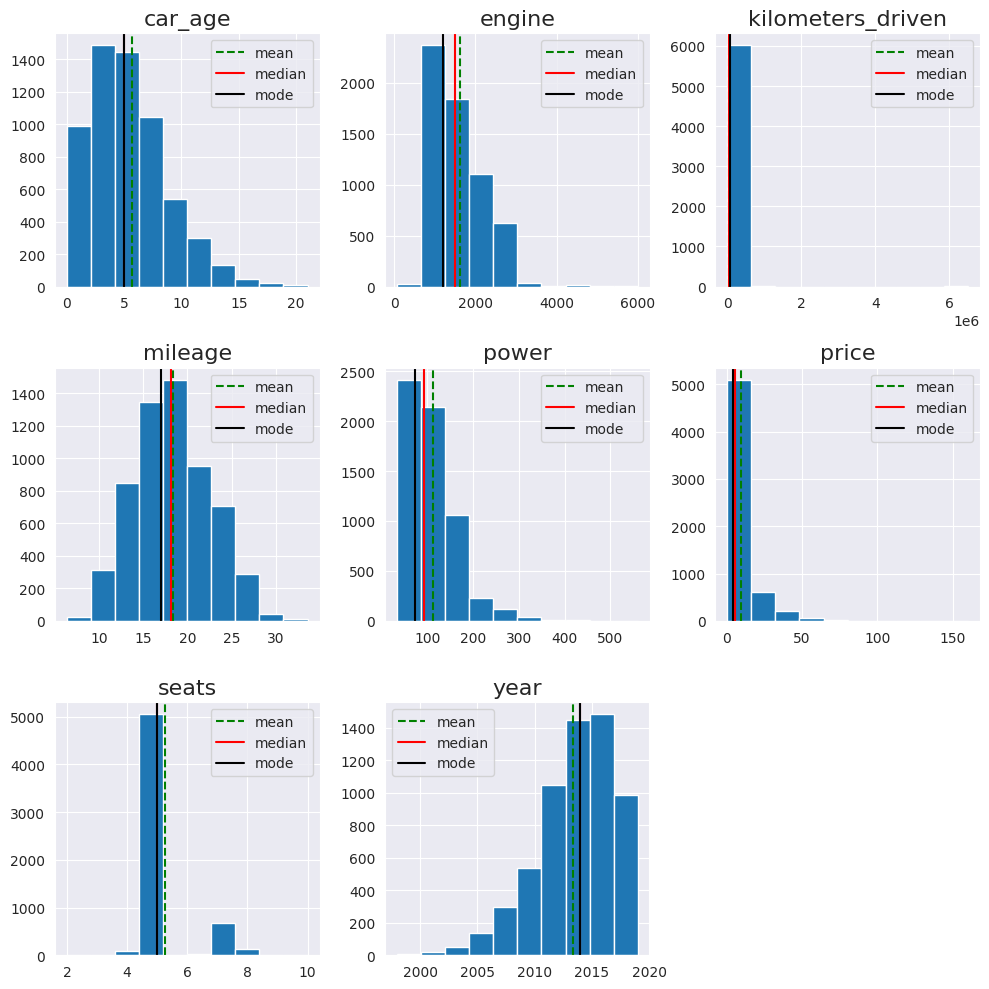

In [ ]:
histogram_overview(data)

**Observation:**
* **car_age** - Right skewed as majority of the used cars less than 10 years old.
* **engine**  - Right skewed as there some cars with large engines.
* **kilometers_driven** is highly right skewed. There may be as a result of a few outliers beyond 200,000. These outliers will be dealt with later on.
* **mileage** - Somewhat normally distribited.
* **power** - Right skewed as there are a cars with large engines.
* **price** - Highly right skewed as there may a few used luxury cars for sale.
* **seats**  - There is no clear distribution as seats are ordinal numerical variables. Majority of the cars have 5 seats.
* **year** -  Left skewed as the majority of the used cars were manufactured from 2010.

**Boxplot overview**

In [ ]:
def boxplot_overview(data):
    """
    This function below generates a subplots of `box plots` &
    showing the `distribution of the numerical variable input with outliers`.

    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    """

    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)) )
        # Subplot no of rows
        subplot_nrows = math.ceil(len(num_vars) / subplot_ncols)

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

In [ ]:
boxplot_overview(data)

**Observation:**
* There are significant amount of upper outliers is the **engine**,**kilometers_driven**, **power** and **price** variables.
* **kilometers_driven** - There are many outliers but there a few significantly large ones skewing the data.
* **seats**  - Since seats is discete numerical variable there are outliers around the medin.
* **year** -  There are lot of lower outliers.

---

**Outlier check function**

In [ ]:
# Outlier check
def outlier_count(data):
    """
    This function checks the lower and upper
    outliers for all numerical variables.

    Outliers are found where data points exists either:
    - Greater than `1.5*IQR` above the 75th percentile
    - Less than `1.5*IQR` below the 25th percentile
    """
    numeric = data.select_dtypes(include=np.number).columns.to_list()
    for i in numeric:
        # Get name of series
        name = data[i].name
        # Calculate the IQR for all values and omit NaNs
        IQR = spy.stats.iqr(data[i], nan_policy="omit")
        # Calculate the boxplot upper fence
        upper_fence = data[i].quantile(0.75) + 1.5 * IQR
        # Calculate the boxplot lower fence
        lower_fence = data[i].quantile(0.25) - 1.5 * IQR
        # Calculate the count of outliers above upper fence
        upper_outliers = data[i][data[i] > upper_fence].count()
        # Calculate the count of outliers below lower fence
        lower_outliers = data[i][data[i] < lower_fence].count()
        # Check if there are no outliers
        if (upper_outliers == 0) & (lower_outliers == 0):
            continue
        print(
            f"The '{name}' distribution has '{lower_outliers}' lower outliers and '{upper_outliers}' upper outliers.\n"
        )

In [ ]:
#Applying the Outlier check function
outlier_count(data)

The 'car_age' distribution has '0' lower outliers and '50' upper outliers.

The 'engine' distribution has '0' lower outliers and '61' upper outliers.

The 'kilometers_driven' distribution has '0' lower outliers and '202' upper outliers.

The 'mileage' distribution has '1' lower outliers and '14' upper outliers.

The 'power' distribution has '0' lower outliers and '238' upper outliers.

The 'price' distribution has '0' lower outliers and '718' upper outliers.

The 'seats' distribution has '115' lower outliers and '848' upper outliers.

The 'year' distribution has '50' lower outliers and '0' upper outliers.



---

**Skew Summary**

In [ ]:
# Display the skew summary for the numerical variables
for var in data.select_dtypes(include=np.number).columns.to_list():
    var_skew = data[var].skew()
    if var_skew > 1:
        print(f"The '{var}' distribution is highly right skewed.\n")
    elif var_skew < -1:
        print(f"The '{var}' distribution is highly left skewed.\n")
    elif (var_skew > 0.5) & (var_skew < 1):
        print(f"The '{var}' distribution is moderately right skewed.\n")
    elif (var_skew < -0.5) & (var_skew > -1):
        print(f"The '{var}' distribution is moderately left skewed.\n")
    else:
        print(f"The '{var}' distribution is fairly symmetrical.\n")

The 'car_age' distribution is moderately right skewed.

The 'engine' distribution is highly right skewed.

The 'kilometers_driven' distribution is highly right skewed.

The 'mileage' distribution is fairly symmetrical.

The 'power' distribution is highly right skewed.

The 'price' distribution is highly right skewed.

The 'seats' distribution is highly right skewed.

The 'year' distribution is moderately left skewed.



### Correlation Analysis

Let's check to see to see if there are correlations between the numerical variables.

From above we have defined a `num_var` as a list of numerical variables.  
Let's use this list to generate a sub dataframe for correlation analysis.  
We shall use the `filter()` function as it can retrieve columns based on the column names.

In [ ]:
num_df = data.filter(num_var)
num_df.head()

,car_age,engine,kilometers_driven,mileage,power,price,seats,year
0,16,1489.0,80000,12.80,35.5,1.35,5.0,2003
1,5,1968.0,79271,20.38,143.0,16.50,5.0,2014
2,2,1968.0,22000,20.38,143.0,22.50,5.0,2017
3,3,1968.0,20003,20.38,143.0,19.25,5.0,2016
4,3,1968.0,39000,20.38,143.0,18.90,5.0,2016


Let's drop `year` column since it is a temporal varible.

In [ ]:
num_df = num_df.drop(columns='year')

**Heat Map**

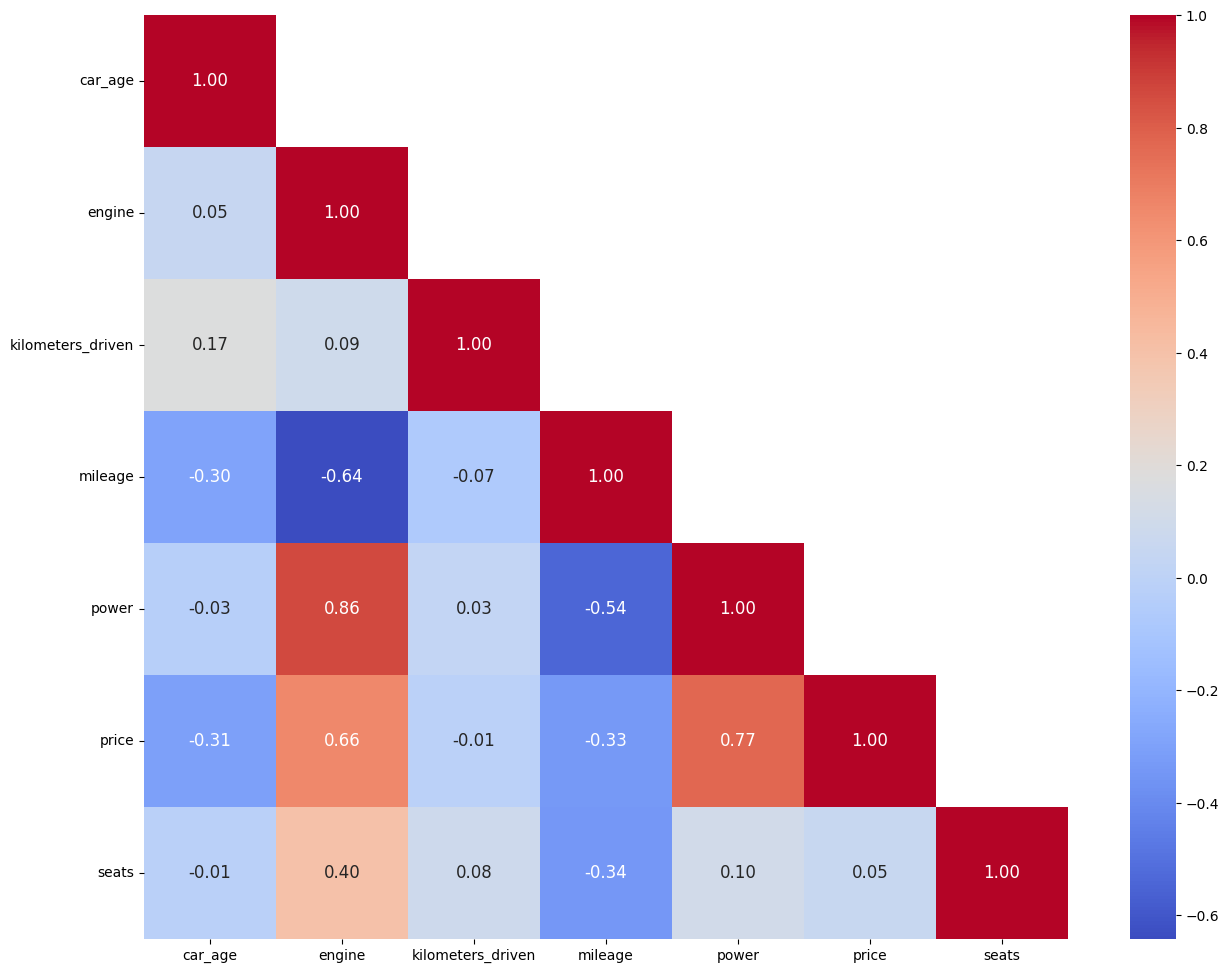

In [ ]:
oh_corr = num_df.corr()

annot_kws = {"fontsize": 12}

symmetric_matrix = (oh_corr + oh_corr.T) / 2

# Create a mask for the upper half of the matrix
mask = np.triu(np.ones_like(symmetric_matrix), k=1)

plt.figure(figsize=(16, 12))
sns.heatmap(oh_corr, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', square=True, annot_kws=annot_kws)
plt.yticks(rotation=0)
plt.show()

---

## Categorical Variables

**List of categorical variables**

In [ ]:
cat_var = data.select_dtypes(exclude=np.number).columns.to_list()
print(cat_var)

['car_name', 'car_make', 'car_model', 'car_spec', 'fuel_type', 'location', 'owner_type', 'region', 'transmission']


During Missing Value treatment, rows were dropped that contained categorical values.  
In the case where all instances of a categorical state being dropped, the dataframe will still contain the state identities which will produce a value count of 0.  
To deal with this we shall check through all categorical variables and remove unused categories.

In [ ]:
for var in cat_var:
    if any(data[var].value_counts()==0):
        data[var] = data[var].cat.remove_unused_categories()

Now let's check the number of states each categorical variable has to determine how we explore them.

In [ ]:
# Check the unique values
data[cat_var].nunique().to_frame().T

,car_name,car_make,car_model,car_spec,fuel_type,location,owner_type,region,transmission
0,215,30,211,1705,5,11,4,4,2


Since many of the categorical variables have more than 3 states, then we shall use the `bar chart` as it more suitable compared to a `pie chart`.

---

We shall use bar chart to represent the categorical variables.

In [ ]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """

    # Create a horizontal count plot while sorting variables in descending order
    g = sns.countplot(y=data, order = data.astype(str).value_counts().index)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data)
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size=12)
        plt.title("Distribution of {}".format(
            data.name), loc="center", fontsize=22)
    plt.show()
    # Line separator
#     print('--'*55)

---

**Car Name Distribution**

Since car_name has 213 states let's show the top 10

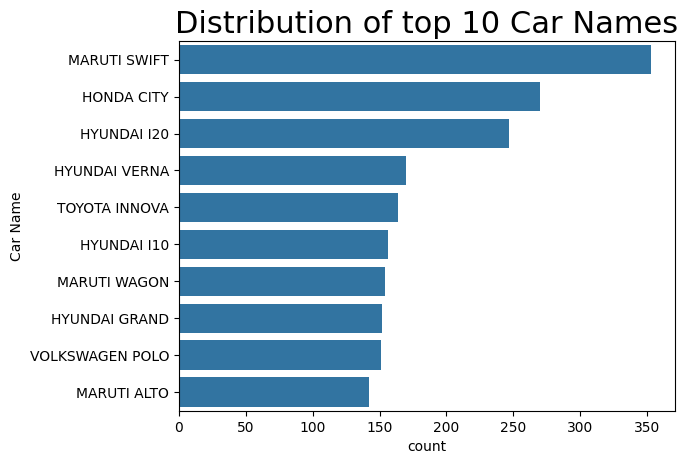

In [ ]:
top10_car_name = data.car_name.value_counts().nlargest(10)
sns.barplot(y = top10_car_name.index, x = top10_car_name)
plt.ylabel('Car Name')
plt.title("Distribution of top 10 Car Names",fontsize = 22)
plt.show()

**Observation:**
* `MARUTI SWIFT` is the most popular car while `MARUTI ALTO` is the 10th most popular.

---

**Car_make Distribution**

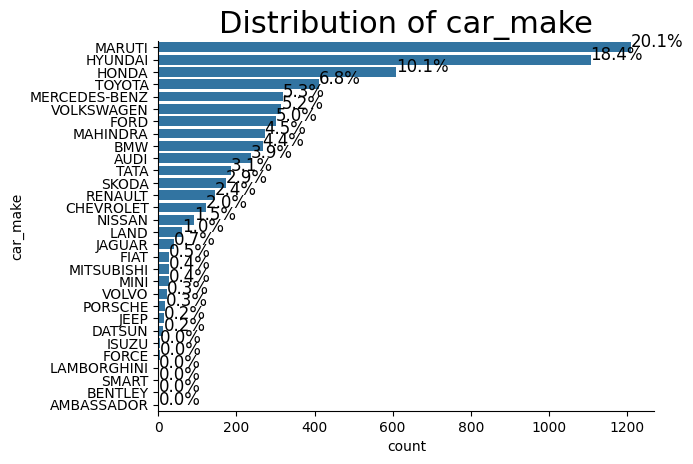

In [ ]:
bar_chart(data.car_make)

**Observation:**
* `MARUTI` is the most popular car while `BENTLEY` is the least popular.

**Car Make by Price**

In [ ]:
data.groupby(["car_make"])["price"].mean().sort_values(ascending=False)

,price
car_make,
LAMBORGHINI,120.000000
BENTLEY,59.000000
PORSCHE,48.348333
LAND,39.259500
JAGUAR,37.632250
MINI,26.896923
MERCEDES-BENZ,26.809874
AUDI,25.537712
BMW,25.243146


The output is very close to our expectation (domain knowledge), in terms of brand ordering.

Mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in a descending order.

Towards the bottom end we have the more budget friendly brands.

**Binning cars in categories based on price**

In [ ]:
price_ranges = [0.0, 10.0, 20.0, 50.0, float('inf')]
price_labels = ["Budget_Friendly", "Mid-Range", "Luxury_Cars", "Ultra_Luxury"]

# Create a new column "Price_Category" by binning the "Price" variable
data['car_category'] = pd.cut(data['price'], bins=price_ranges, labels=price_labels, right=False)


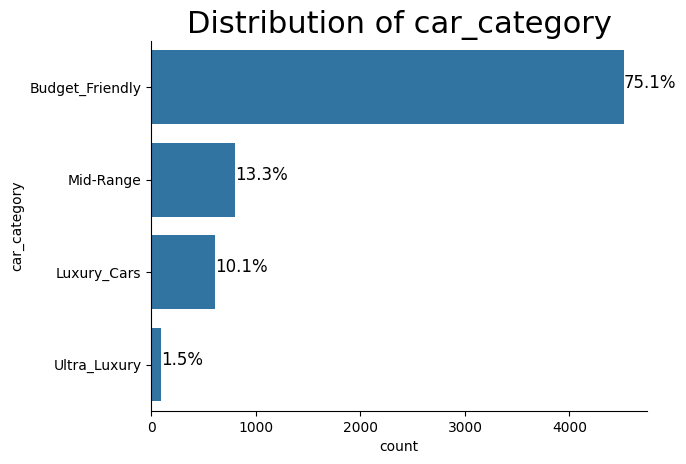

In [ ]:
bar_chart(data.car_category)

---

**Fuel_type Distribution**

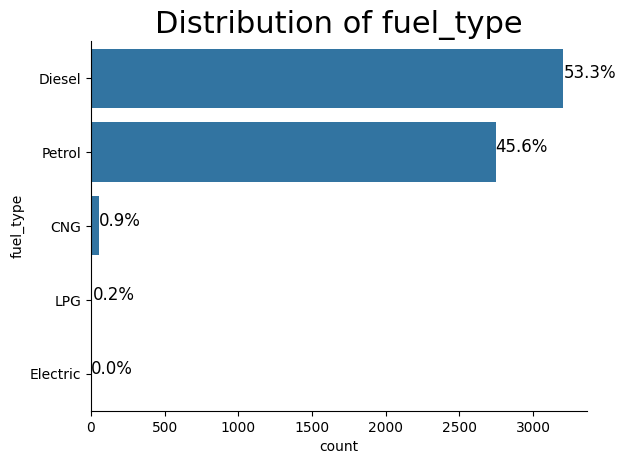

In [ ]:
bar_chart(data.fuel_type)

**Observation:**
* `Diesel` is the most popular fuel type.  
* `Diesel` and `Petrol` cars comprise the majority of the dataset (~98.9%).  
In further analysis we shall only consider cars of `Diesel` and `Petrol` fuel types.

---

**Location Distribution**

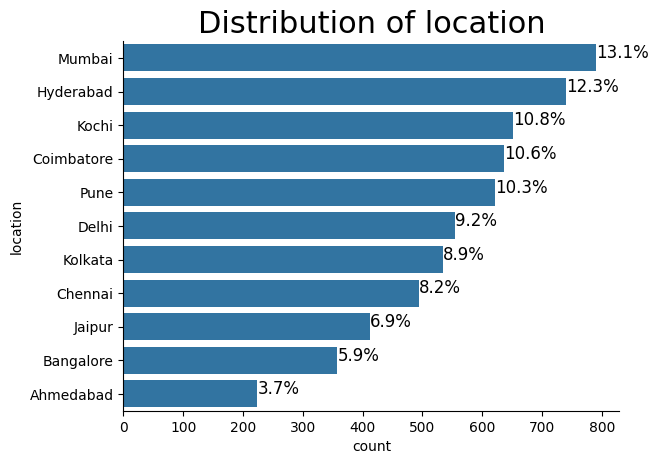

In [ ]:
bar_chart(data.location)

**Observation:**
* `Mumbai` has the most amount of used cars for sale while `Ahmedabad` has the least.

**Region Distribution**

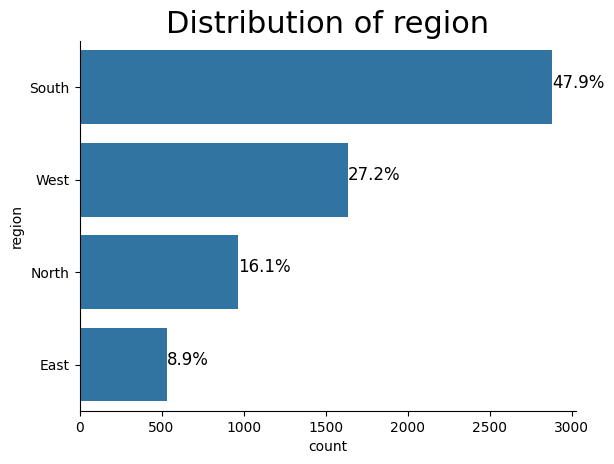

In [ ]:
bar_chart(data.region)

---

**Owner_type Distribution**

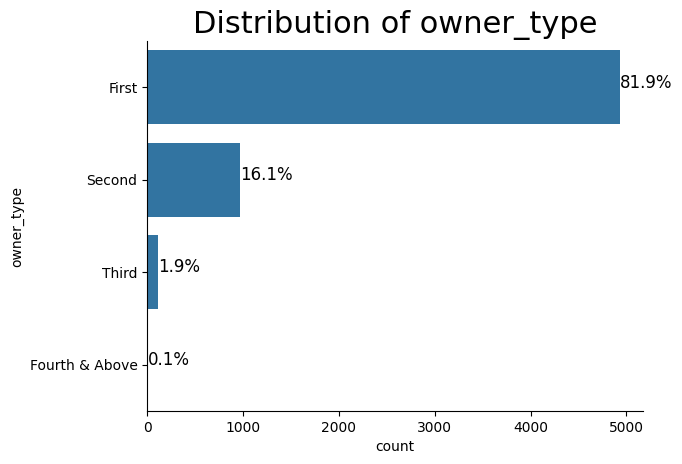

In [ ]:
bar_chart(data.owner_type)

**Observation:**
* The majority of the used cars are either `First` and `Second` owner types. These account for ~98%.  
In further analysis we shall only consider cars of First` and `Second` owner types.

---

**Transmission Distribution**

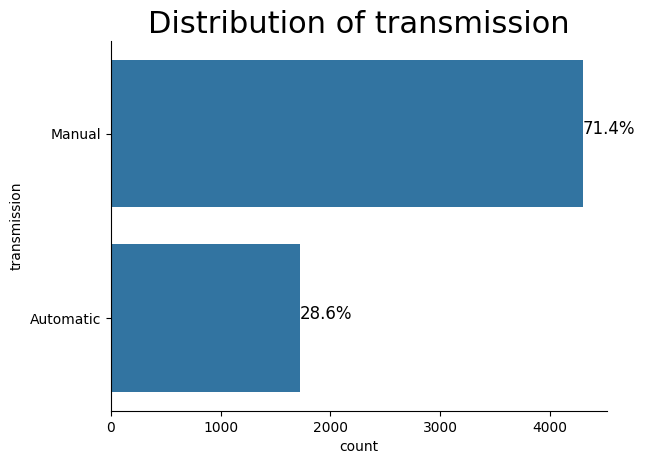

In [ ]:
bar_chart(data.transmission)

**Observation:**
* The majority of the cars in the dataset are `Manual` transmission.

---

# Data Preparation

**Create a clone of the dataset**

In [ ]:
df1 = copy.deepcopy(data)

**Dropping unnecessary columns**

In [ ]:
df1_cols = df1.columns.to_list()
drop_cols = ['car_name', 'car_make', 'car_model', 'car_spec','location', 'year']
df1.drop(columns=drop_cols, inplace=True)

**Dropping highly correlated columns**

The `engine` and `power` variables were highly positively correlated. In the context of vehicles, the bigger the engine size the more powerful is the vehicle.

Therefore the `power` variable will also be dropped.

In [ ]:
df1.drop(columns='power', inplace=True)

**Scaling Mileage based on Mileage units**

To do this we shall create two separate series for the scaled value of either unit then combine both series.

In [ ]:
# Assuming you want to normalize the 'mileage' column (with no unit differentiation)

# Calculate min and max of the 'mileage' column
mileage_min = df1['mileage'].min()
mileage_max = df1['mileage'].max()

# Apply normalization to the 'mileage' column
df1['mileage_scaled'] = df1['mileage'].apply(lambda x: (x - mileage_min) / (mileage_max - mileage_min))

# Drop the 'mileage' column after scaling, if necessary
df1.drop(['mileage'], axis=1, inplace=True)


**Missing Value Check**

In [ ]:
missing_val_chk(df1)

There are NO missing values in the dataset


---

Now let consider dealing with the outliers.

Lets **log transform to the numerical variables**.

Note the `seats` and `car_age` are ordinal variables which we shall not do any outlier corrections

In [ ]:
# Column to Log transform
log_cols = ["engine", "kilometers_driven", "price",'mileage_scaled']

for col in log_cols:
    df1[col] = np.log(df1[col])

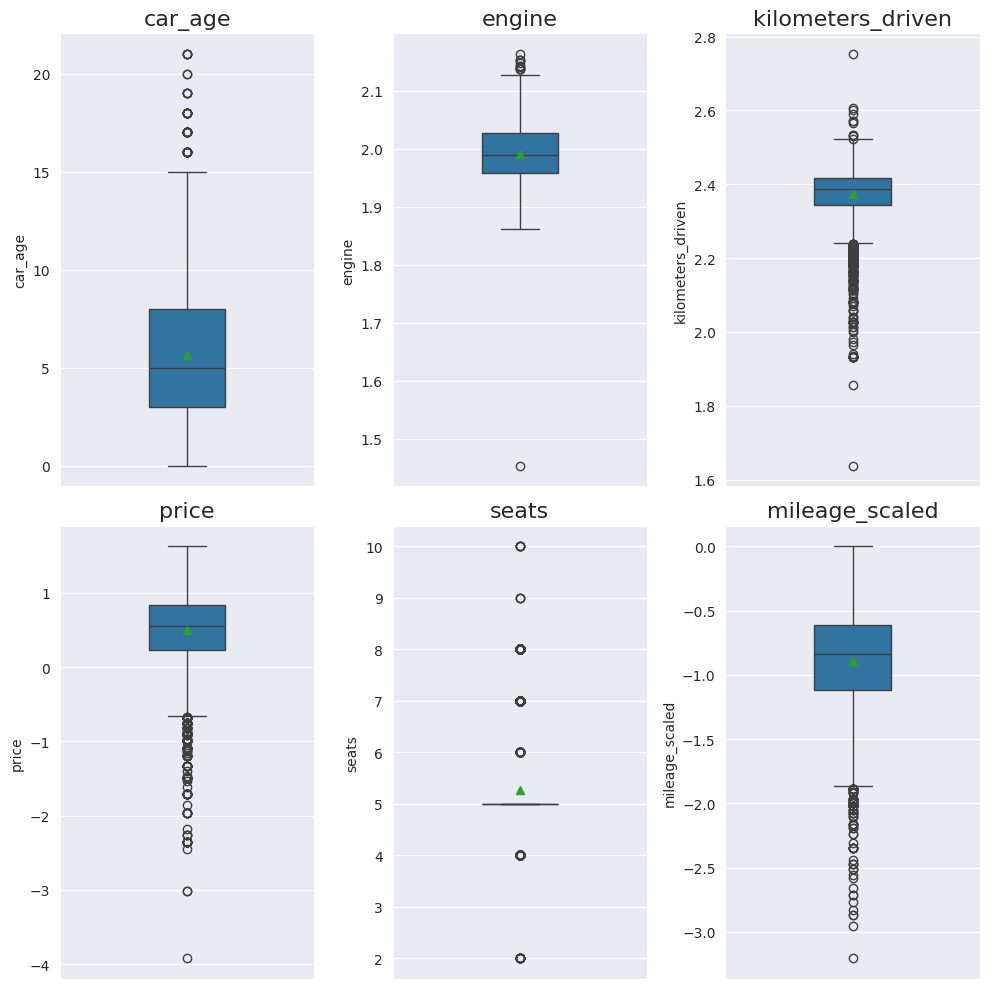

In [ ]:
# Check the boxplot overview to see if any outliers still exist
boxplot_overview(df1)

There is still outliers in the log transformed data but lets continue with the evaluation.

## Outlier Treatment

Now let consider dealing with the outliers.

There are different methods to deal with outliers but lets us start with **Data capping/Winsorizing**

Note the `seats` and `car_age` are ordinal variables which we shall not do any outlier corrections

Outlier are values that exist beyond the upper and lower whiskers of the boxplot.

So lets clip outliers to their respective upper and lower whisker.

**Clipping lower and upper numerical outliers to lower and upper whiskers respectively**

In [ ]:
# List of numeric variables
numeric = df1.select_dtypes(include=np.number).columns.to_list()
numeric.remove('seats')
numeric.remove('car_age')

In [ ]:
for var in numeric:
    Q1 = df1[var].quantile(0.25)  # 25th quantile
    Q3 = df1[var].quantile(0.75)  # 75th quantile
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df1[var] = np.clip(df1[var], Lower_Whisker, Upper_Whisker)

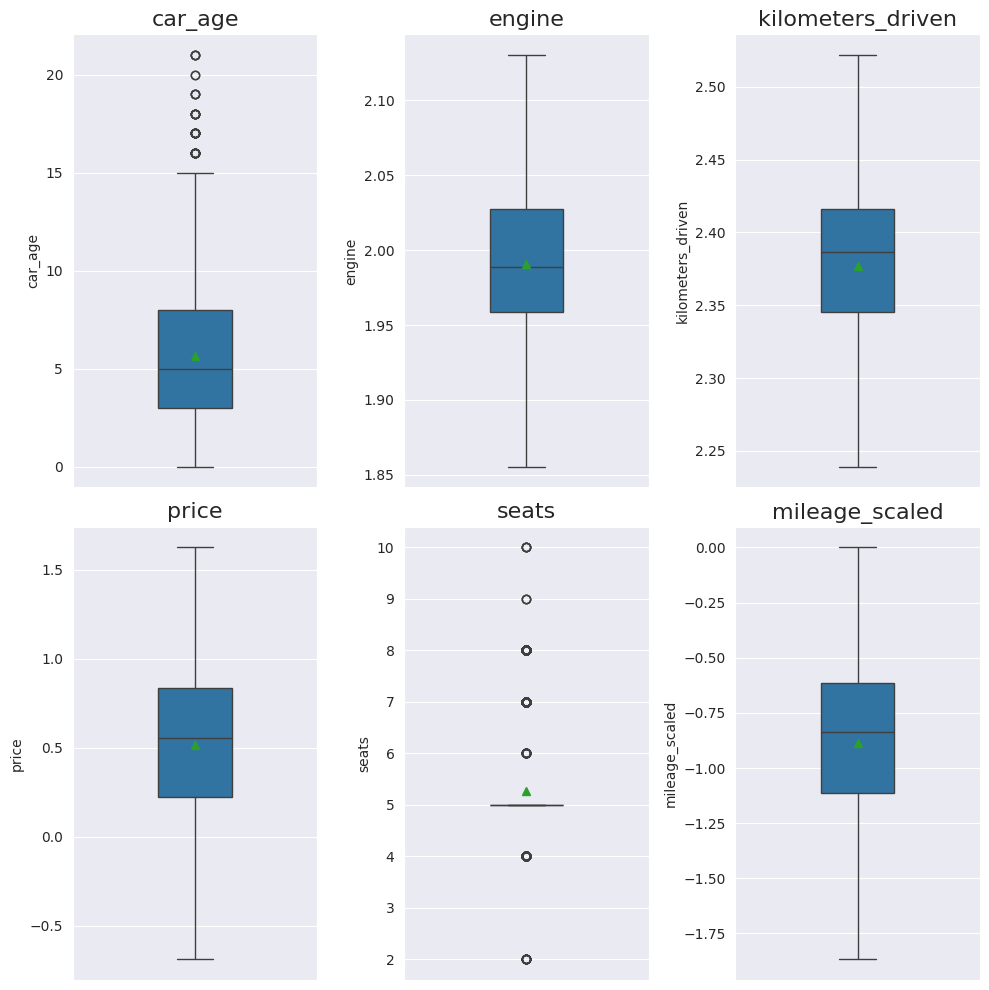

In [ ]:
# Check the boxplot overview to see if any outliers still exist
boxplot_overview(df1)

There are no more outlier for continuous variables

**Encoding Categorical Variables**

In [ ]:
# Get list of categorical values for onehot encoding
vars_req_encoding = df1.select_dtypes(exclude=np.number).columns.to_list()
vars_req_encoding

['fuel_type', 'owner_type', 'region', 'transmission', 'car_category']

**One hot encoding**

In [ ]:
df1 = pd.get_dummies(df1, columns = vars_req_encoding, drop_first=True, dtype=float)
df1.head()

,car_age,engine,kilometers_driven,price,seats,mileage_scaled,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,owner_type_Fourth & Above,owner_type_Second,owner_type_Third,region_North,region_South,region_West,transmission_Manual,car_category_Mid-Range,car_category_Luxury_Cars,car_category_Ultra_Luxury
0,16,1.988677,2.423898,-0.687670,5.0,-1.444711,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,5,2.026143,2.423087,1.030819,5.0,-0.663381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,2.026143,2.302465,1.135752,5.0,-0.663381,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2.026143,2.292902,1.084348,5.0,-0.663381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3,2.026143,2.358144,1.078124,5.0,-0.663381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
missing_val_chk(df1)

The missing values summary


,# missing,percent
price,77,1.279


In [ ]:
mean_price = df1['price'].mean()
df1['price'].fillna(mean_price, inplace=True)


---

# Model Building

**Separating Independent and Dependent variables**

In [ ]:
# Separating Independent and Dependent variables**
# Independant variables
x = df1.drop(['price'], axis=1)
# Dependent variable
y = df1[['price']]

## Statsmodels Ordinary Least Squares (OLS)

**Prepare training and testing datasets**

In [ ]:
# This adds the constant term beta0 to the Linear Regression.
# "sm.add_constant(x)" - adds a column of ones the shape of x
X_con = sm.add_constant(x)
X_train, X_test, Y_train, Y_test = train_test_split(X_con,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1)

**Train, Test set details**

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in train data =", X_test.shape[0])

Number of rows in train data = 4212
Number of rows in train data = 1806


**Make the linear model using OLS**

In [ ]:
ols_model = sm.OLS(Y_train, X_train).fit()
# OLS Summary
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     776.8
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:56:07   Log-Likelihood:                 299.04
No. Observations:                4212   AIC:                            -558.1
Df Residuals:                    4192   BIC:                            -431.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.3611      0.360    -20.445      0.000      -8.067      -6.655
car_age                      -0.0576      0.002    -37.374      0.000      -0.061      -0.055
engine                        4.7479      0.167     28.510      0.000       4.421       5.074
kilometers_driven            -0.5423      0.081     -6.655      0.000      -0.702      -0.383
seats                        -0.0216      0.006     -3.838      0.000      -0.033      -0.011
mileage_scaled                0.0185      0.018      1.013      0.311      -0.017       0.054
fuel_type_Diesel              0.1186      0.038      3.109      0.002       0.044       0.193
fuel_type_Electric            0.4905      0.165      2.976      0.003       0.167       0.814
fuel_type_LPG                -0.0498      0.094     -0.533      0.594      -0.233       0.133
fuel_type_Petrol              0.0401      0.038      1.052      0.293      -0.035       0.115
owner_type_Fourth & Above    -0.0398      0.093     -0.427      0.669      -0.222       0.143
owner_type_Second            -0.0532      0.010     -5.246      0.000      -0.073      -0.033
owner_type_Third             -0.0443      0.027     -1.655      0.098      -0.097       0.008
region_North                  0.1350      0.015      8.970      0.000       0.106       0.165
region_South                  0.1690      0.013     12.639      0.000       0.143       0.195
region_West                   0.1282      0.014      9.277      0.000       0.101       0.155
transmission_Manual          -0.1402      0.011    -13.238      0.000      -0.161      -0.119
car_category_Mid-Range        0.2024      0.013     15.130      0.000       0.176       0.229
car_category_Luxury_Cars      0.2465      0.017     14.736      0.000       0.214       0.279
car_category_Ultra_Luxury     0.2134      0.032      6.696      0.000       0.151       0.276
==============================================================================
Omnibus:                      521.635   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5812.500
Skew:                           0.030   Prob(JB):                         0.00
Kurtosis:                       8.755   Cond. No.                         989.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Predictions on the training set
# X_train represents the feature variables for the training set
y_train_pred = ols_model.predict(X_train)

# Predictions on the test set
# X_test represents the feature variables for the test set
y_test_pred = ols_model.predict(X_test)

# Calculate RMSE, MAE, and MAPE for the training set
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
train_mae = mean_absolute_error(Y_train, y_train_pred)

# Calculate RMSE, MAE, and MAPE for the test set
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
test_mae = mean_absolute_error(Y_test, y_test_pred)

# Print the results
print("Train RMSE:", round(train_rmse, 3))
print("Test RMSE:", round(test_rmse, 3))
print("Train MAE:", round(train_mae, 3))
print("Test MAE:", round(test_mae, 3))

Train RMSE: 0.225
Test RMSE: 0.225
Train MAE: 0.156
Test MAE: 0.155


---

**Interpreting the Regression Results:**

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.778**, which is  a very good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like car_age, engine and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-7.3611**

3. **power coef**: It represents the change in the output Y due to a change of one unit in the power (while everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis  

    Ho : Independent feature is not significant

    Ha : Independent feature is that it is significant
    
    Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
    * A p-value of less than 0.05 is considered to be statistically significant.

    **From above we can clearly see:**
    * All the numerical variables have p-values smaller that 0.0001, therefore they are all features are statistically significant.
    * There are many categorical elements with p-values >0.05
   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

---

**Visualizing OLS prediction**

**Price: Actuals vs Predictions**

Lets visualize the plot of the price Prediction to the Actual Values

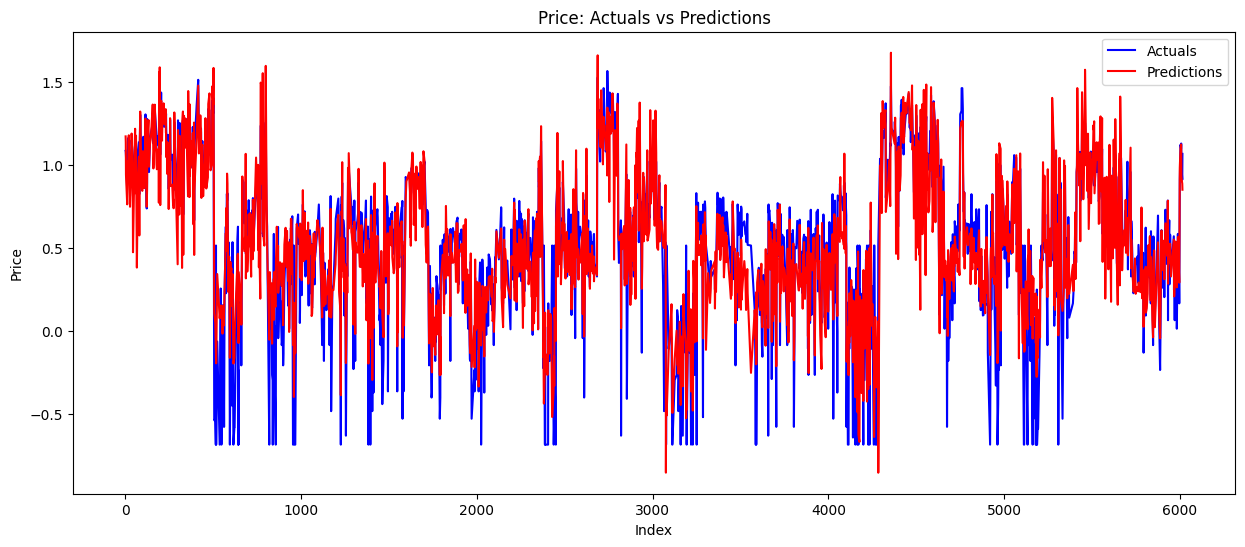

In [ ]:
# Generate subplot
fig, ax = plt.subplots(figsize=(15, 6))
# Plot Actual Price values
sns.lineplot(x=Y_test.index,
             y=Y_test.price,
             label='Actuals',
             color='blue',
             ax=ax)
# Plot Price Prediction values
sns.lineplot(x=Y_test.index,
             y=y_test_pred,
             label='Predictions',
             color='red',
             ax=ax)
# Configure axes titles
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')
plt.show()

**Observations:**
* The predictions appear to be tracking the actual values. This is indicated by the high Adjusted R2 value of 0.907

---

## Testing Linear Regression Assumptions

Although we have identified that:
* There does not exist a strong linear relationship between Residuals and Predictions,
* There is indication of *Heteroscedasticity*
* The residuals follow a normal distribution.

Lets test the Linear Regression Assumptions.
1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

**Testing for Multicollinearity using VIF scores**

Test for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.  


* There are different ways of detecting(or  testing) multi-collinearity, one such way is the **Variance  Inflation  factor**:      
    * Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient β̂k is *inflated* by  the  existence  of  correlation  among  the  predictor variables in the model.


* General Rule of thumb:
    * If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all.
    * if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

Lets check the VIF scores for the OLS training dataset **X_train**

**Import variance_inflation_factor from statsmodels**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# create an empty dataframe
vif = pd.DataFrame()
# add "variables" series from the columns of X_train
vif['variables'] = X_train.columns
# calculate the VIF values for all elements from second row
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# display vif dataframe
vif

,variables,VIF
0,const,10697.148997
1,car_age,2.121204
2,engine,4.752030
3,kilometers_driven,1.849365
4,seats,1.652136
5,mileage_scaled,3.896832
6,fuel_type_Diesel,29.922379
7,fuel_type_Electric,1.063766
8,fuel_type_LPG,1.197174
9,fuel_type_Petrol,29.845444


**Observations:**

`fuel_type` variables are showing high vif because most cars are either diesel and petrol. These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model

---

**Mean of residuals**

In [ ]:
model_residuals = ols_model.resid
print(f"The mean of the residuals are  '{round(model_residuals.mean())}'.")

The mean of the residuals are  '0'.


Mean of redisuals is very close to 0. The second assumption is also satisfied.

---

**Heteroscedasticity**

*Homoscedacity* - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

*Heteroscedasticity* - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

<u>Null hypothesis</u> : Residuals are homoscedastic

<u>Alternate hypothesis</u> : Residuals have hetroscedasticity

alpha = 0.05

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test_methods = ["F statistic", "p-value"]
test_function = sms.het_goldfeldquandt(model_residuals, X_train)
lzip(test_methods, test_function)

[('F statistic', 1.093082967971654), ('p-value', 0.021081542784360092)]

Since p-value > 0.05 we <u>cannot reject</u> the Null Hypothesis that the residuals are **homoscedastic**.

**Observed vs Predicted values**

Lets visualize the plot of the price Observed to the Predicted Values

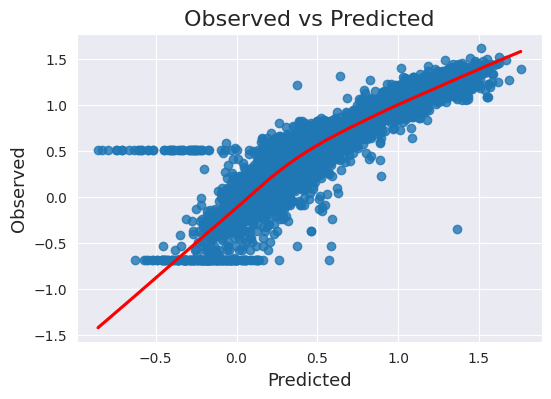

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
sns.regplot(x=ols_model.predict(),
            y=Y_train,
            lowess=True,
            line_kws={'color': 'red'})
plt.title('Observed vs Predicted', fontsize=16)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Observed', fontsize=13)
plt.show()

**Observations:**
* There does appear to be a strong linear relationship between the Residuals and the Prediction.
* The variance of the residuals changes significantly with Prediction. **Homoscedasticity** exists.

---

**Linearity of variables**

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

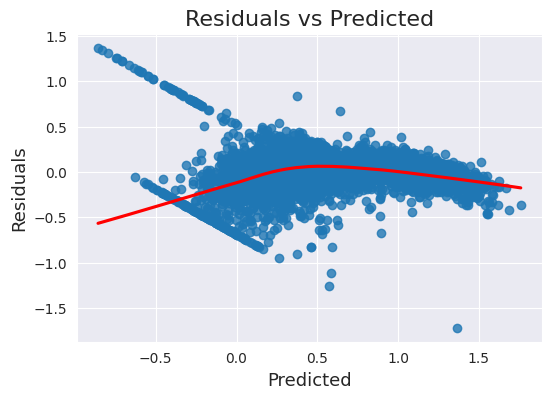

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
sns.regplot(x=ols_model.predict(),
            y=ols_model.resid,
            lowess=True,
            line_kws={'color': 'red'})
plt.title('Residuals vs Predicted', fontsize=16)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Residuals', fontsize=13)
plt.show()

**Observations:**
* There appears to be a linear relationship between the Residuals and the Prediction.
* The variance of the residuals relatively constant with Prediction. **Homoscedasticity** exists.
* There appears to be some outliers that may not have been dealt with.

---

**Normality of error terms**

The residuals should be normally distributed.

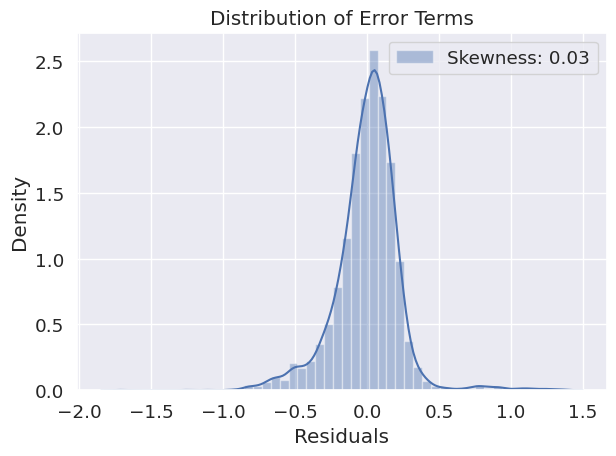

In [ ]:
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
sns.distplot(ols_model.resid, label='Skewness: %.2f' %ols_model.resid.skew())
plt.title("Distribution of Error Terms")
plt.xlabel("Residuals")
plt.tight_layout()
plt.legend()
plt.show()

**Observations:**
* The residuals follow a normal distribution.

**Residuals QQ Plot**   

Lets visualize the Residuals QQ Plot.

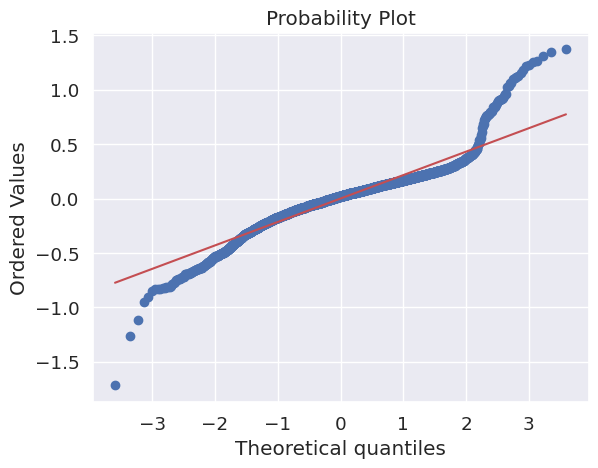

In [ ]:
import scipy.stats as stats
import pylab
stats.probplot(ols_model.resid, dist='norm', plot=plt)
plt.show()

**Observations:**
* The residuals follow a normal distribution for most of the data.

---

# Table of Regression Coefficients

In [ ]:
# extract Regression Coeff from OLS model
coeff_table = ols_model.summary2().tables[1][["Coef."]]
# Rename columns name for ease of use
coeff_table = coeff_table.rename(columns={'Coef.': 'reg_coeff'})
# display regression coefficients
coeff_table

,reg_coeff
const,-7.361091
car_age,-0.057642
engine,4.747863
kilometers_driven,-0.542256
seats,-0.021585
mileage_scaled,0.018466
fuel_type_Diesel,0.118600
fuel_type_Electric,0.490515
fuel_type_LPG,-0.049831
fuel_type_Petrol,0.040144


**Top 10 largest regression coefficients**

In [ ]:
coeff_table.reg_coeff.nlargest(10).to_frame()

,reg_coeff
engine,4.747863
fuel_type_Electric,0.490515
car_category_Luxury_Cars,0.246474
car_category_Ultra_Luxury,0.213427
car_category_Mid-Range,0.202422
region_South,0.169019
region_North,0.135036
region_West,0.128208
fuel_type_Diesel,0.118600
fuel_type_Petrol,0.040144


**Top 10 smallest regression coefficients**

In [ ]:
coeff_table.reg_coeff.nsmallest(10).to_frame()

,reg_coeff
const,-7.361091
kilometers_driven,-0.542256
transmission_Manual,-0.140243
car_age,-0.057642
owner_type_Second,-0.053181
fuel_type_LPG,-0.049831
owner_type_Third,-0.044292
owner_type_Fourth & Above,-0.039784
seats,-0.021585
mileage_scaled,0.018466


**Regression coefficients sorted in descending order**

In [ ]:
coeff_table.sort_values(by="reg_coeff", ascending=False)

,reg_coeff
engine,4.747863
fuel_type_Electric,0.490515
car_category_Luxury_Cars,0.246474
car_category_Ultra_Luxury,0.213427
car_category_Mid-Range,0.202422
region_South,0.169019
region_North,0.135036
region_West,0.128208
fuel_type_Diesel,0.118600
fuel_type_Petrol,0.040144


---

**Regression coefficients and unit price increase sorted in descending order**

In [ ]:
coeff_table['unit_price_increase (Lakh)'] = round(np.exp(coeff_table['reg_coeff'] ), 3)
coeff_table.sort_values(by="reg_coeff", ascending=False)

,reg_coeff,unit_price_increase (Lakh)
engine,4.747863,115.338
fuel_type_Electric,0.490515,1.633
car_category_Luxury_Cars,0.246474,1.280
car_category_Ultra_Luxury,0.213427,1.238
car_category_Mid-Range,0.202422,1.224
region_South,0.169019,1.184
region_North,0.135036,1.145
region_West,0.128208,1.137
fuel_type_Diesel,0.118600,1.126
fuel_type_Petrol,0.040144,1.041


# Model Observations

With our linear regression model we have been able to capture ~90 variation in our data.

The model indicates that the most significant predictors of price of used cars are:
- Engine size
- Car category
- Region
- Fuel type
- Mileage

# Business Recommendations

**Engine Size:** Consider offering a range of engine sizes to cater to different customer preferences. Smaller engines are typically more fuel-efficient, so emphasize their benefits for cost-conscious buyers. For those looking for more power, highlight the advantages of larger engines in terms of performance.
<br>

**Car Category:** Focus on popular car categories in your region. If compact cars are in demand, ensure you have a diverse selection of models in that category. Promote the benefits of each category, such as fuel efficiency for compact cars and spaciousness for SUVs.
<br>

**Region:** Tailor your inventory and marketing to match regional preferences. For example, if SUVs are popular in suburban areas, stock a variety of SUV models and emphasize their suitability for family and outdoor activities.
<br>

**Fuel Type:** Offer cars with different fuel types, including gasoline, diesel, and hybrid options. Highlight the cost savings and environmental benefits of fuel-efficient and hybrid vehicles, especially in regions where eco-friendliness is a priority.
<br>

**Mileage:** Clearly communicate the mileage and maintenance history of each vehicle. Lower mileage vehicles can be priced higher, so ensure prospective buyers have access to this information. Offer special promotions or warranties for low-mileage cars.

---